In [1]:
import boto3
import sys
import sagemaker
from sagemaker import get_execution_role
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
region = boto3.Session().region_name
session = sagemaker.Session()
sm = boto3.Session().client(service_name='sagemaker',region_name=region)

#ins_argument = imp.spec_file_from_file_location("instance", "unit_risk_interns/src/preprocess/helpers/instance.py")
#ins = imp.module_from_spec(ins_argument)
sys.path.extend(['../src/preprocess', '../config'])
import helpers.instance as ins
import helpers.s3 as s3_helper
import helpers.utils as ut
import helpers.athena as at

In [2]:
df = pd.read_csv('trained_data')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,unit_num,Tot_cost_24,Tot_cost_12,Tot_cost_6,Tot_cost_3,AvgT_cost_24,AvgT_cost_12,AvgT_cost_6,AvgT_cost_3,Outside_cost_12,total_time_call_12,total_call_12,total_po_sum_12,time_customer_billed_12,LTD_Total_cost,LTD_Labour_cost,LTD_Outside_cost,LTD_Parts_cost,LTD_Big_repair,LTD_Major_PM,LTD_Road_calls,LTD_Handle_time,LTD_TOTAL_REPAIRS,LTD_customer_rebilled,LTD_PO_Amount,LTD_Labour_hours,LTD_Accients_incidents,avg_pm_ontime_percent,avg_critical_oil_sample_percent,diff_prev6,diff_prev12,diff_prev3,milesdiff_1_6,costPermile_1diff6,Repairs_diff_prev6,Curr_miles,cur_vintage,MajorPM_24_sum,dloc_nt,dregion_cnt,darea_cnt,LOCATION,AREA,REGION,DISTRICT,UNIT_CATEGORY,UNIT_SIZE,PRODUCT_LINE,UNIT_MAKE_CODE,UNIT_MODEL_YEAR,UNIT_FUEL_TYPE,UNIT_BODY_TYPE,UNIT_SOLD_DATE,unit_sold_date,flag_cameback,unit_sold_flag
0,0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.304348,NaN,0.00,0.00,0.00,NaN,NaN,0.0,62782.0,67.0,0.0,1,1,1,0756-10-SOUTH LAS VEGAS,0642-MOUNTAIN,0832-WESTERN REGION,0756-10-SOUTH LAS VEGAS,TRUCK,LIGHT,LEASE,GMC,2014,GAS,2000 06,2019-09-16,NaN,0.0,1
1,1,100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4421.33,1636.77,0.0,2784.56,2.0,2.0,0.0,0.0,11.0,0.0,0.0,24.6,1.0,66.666667,0.0,4421.33,4421.33,4421.33,NaN,NaN,11.0,144464.0,64.0,2.0,1,1,1,0685-10-SAN FRANCISCO,0610-NORTHWEST,0832-WESTERN REGION,0522-10-GOLDEN GATE,TRACTOR,HEAVY,COMMERCIAL RENTAL,FTL,2015,DIESEL,4002 13,2020-06-26,NaN,0.0,1
2,5,100027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.00,0.00,18.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.000000,0.0,18.00,18.00,18.00,NaN,NaN,0.0,123490.0,49.0,0.0,1,1,1,5165-10-BROOK PARK,0643-GREAT LAKES,0835-NORTH CENTRAL REGION,5161-10-CLEVELAND,TRACTOR,HEAVY,LEASE,FTL,2015,DIESEL,4002 13,2020-10-05,2020-10-05 00:00:00.000,1.0,1
3,7,100038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.25,67.38,0.0,291.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.6,0.0,70.000000,0.0,359.25,359.25,359.25,NaN,NaN,1.0,193115.0,54.0,0.0,1,1,1,0119-10-DALLAS NORTH,0614-SOUTH CENTRAL,0894-SOUTH CENTRAL REGION,0119-10-DALLAS NORTH,TRACTOR,HEAVY,LEASE,FTL,2015,DIESEL,4002 13,2019-09-24,NaN,0.0,1
4,8,100041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043.79,239.25,0.0,804.54,0.0,1.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,78.947368,0.0,1043.79,1043.79,1043.79,NaN,NaN,3.0,216543.0,63.0,1.0,1,1,1,0119-10-DALLAS NORTH,0614-SOUTH CENTRAL,0894-SOUTH CENTRAL REGION,0119-10-DALLAS NORTH,TRACTOR,HEAVY,LEASE,FTL,2015,DIESEL,4002 13,2020-04-29,NaN,0.0,1


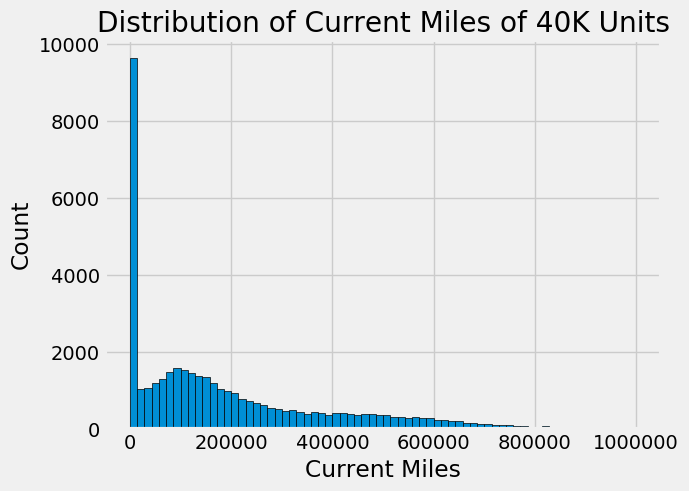

In [3]:
plt.style.use('fivethirtyeight')
plt.hist(df['Curr_miles'], bins=70, range = (0,1000000), edgecolor='black')
plt.title('Distribution of Current Miles of 40K Units')
plt.xlabel('Current Miles')
plt.ylabel('Count')
plt.show()

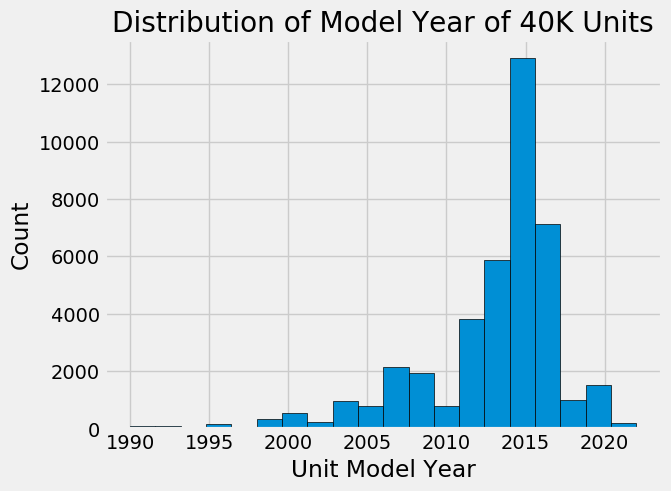

In [26]:
plt.hist(df['UNIT_MODEL_YEAR'], bins=20, range = (1990, 2022), edgecolor='black')
plt.title('Distribution of Model Year of 40K Units')
plt.xlabel('Unit Model Year')
plt.ylabel('Count')
plt.show()

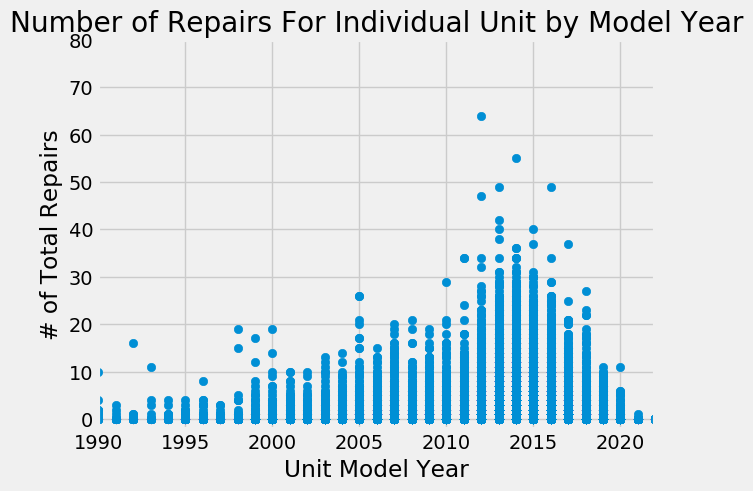

In [36]:
plt.axis([1990, 2022, -2, 80])
plt.scatter(df['UNIT_MODEL_YEAR'], df['LTD_TOTAL_REPAIRS'])
plt.title('Number of Repairs For Individual Unit by Model Year')
plt.xlabel('Unit Model Year')
plt.ylabel('# of Total Repairs')
plt.show()

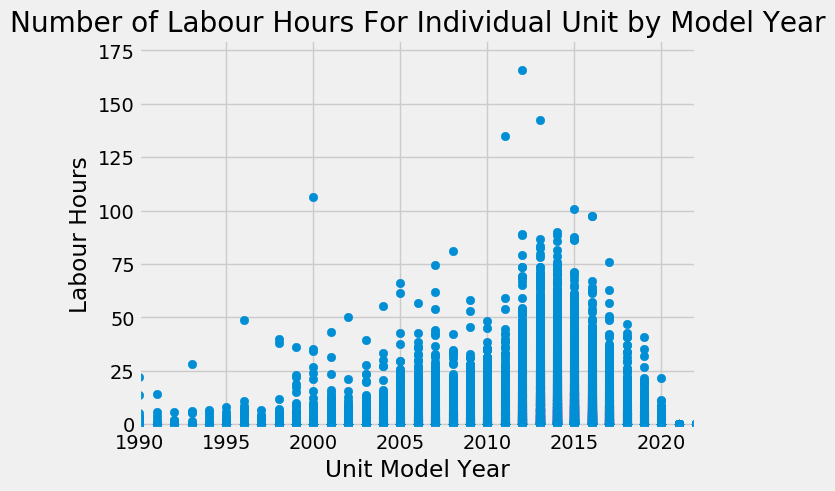

In [37]:
plt.axis([1990, 2022, -2, 180])
plt.scatter(df['UNIT_MODEL_YEAR'], df['LTD_Labour_hours'])
plt.title('Number of Labour Hours For Individual Unit by Model Year')
plt.xlabel('Unit Model Year')
plt.ylabel('Labour Hours')
plt.show()

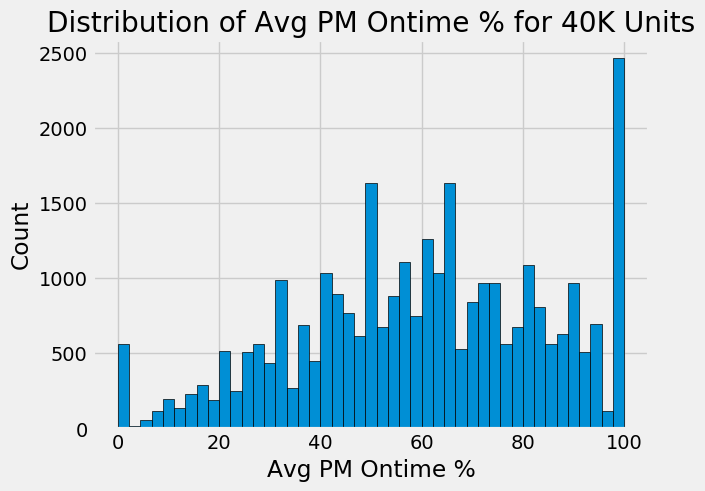

In [43]:
plt.hist(df['avg_pm_ontime_percent'], bins=45, edgecolor='black')
plt.title('Distribution of Avg PM Ontime % for 40K Units')
plt.xlabel('Avg PM Ontime %')
plt.ylabel('Count')
plt.show()